# Diabetes Prediction Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('datasets/diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.rename(columns ={'Pregnancies':'Preg','BloodPressure':'BP','SkinThickness':'ST','DiabetesPedigreeFunction':'DPF'},inplace=True)


In [5]:
dataset.head()

,Preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dataset.isnull().sum()


Preg       0
Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
DPF        0
Age        0
Outcome    0
dtype: int64

In [7]:
dataset.Outcome.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

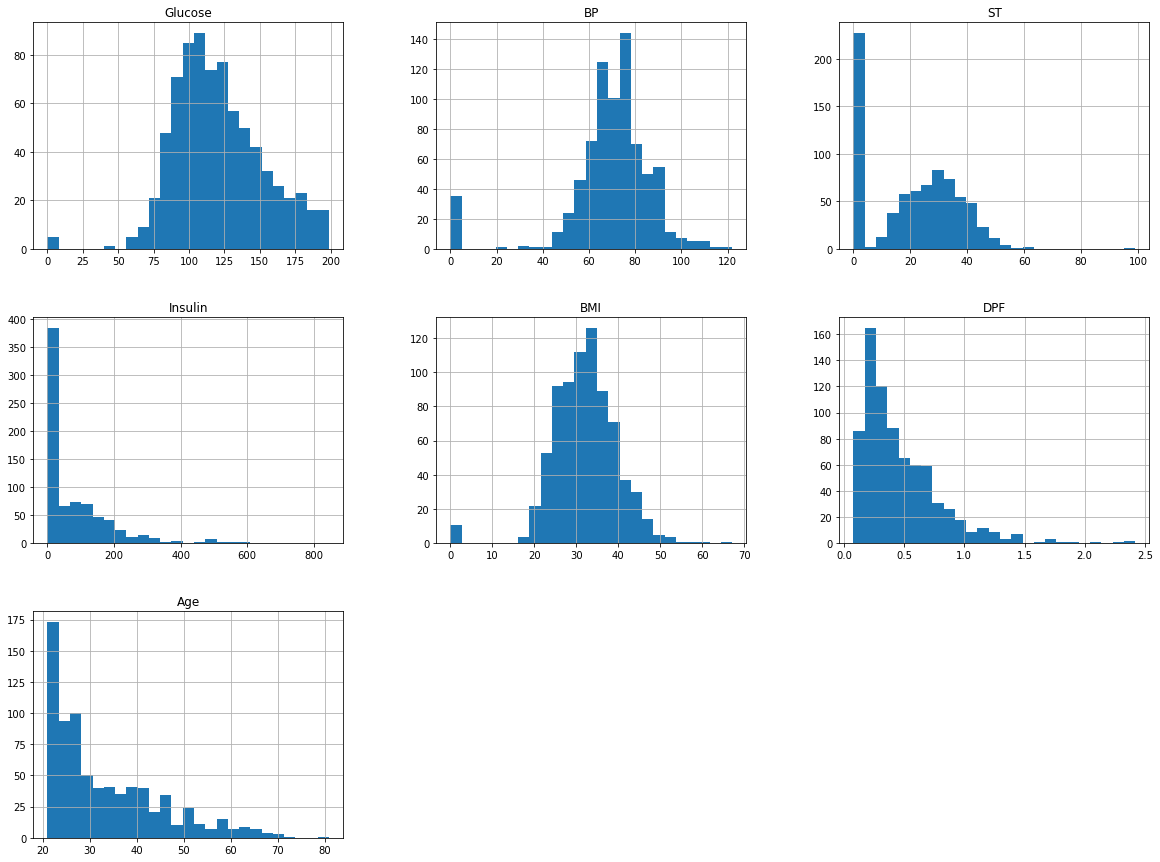

In [8]:
dataset.iloc[:,1:-1].hist(bins=25,figsize=(20,15))
plt.show()

In [9]:
# now we will see in terms of values
dataset.iloc[:,1:-1].isin([0]).sum()

Glucose      5
BP          35
ST         227
Insulin    374
BMI         11
DPF          0
Age          0
dtype: int64

In [10]:
# displaying the statitical information
dataset.iloc[:,1:-3].describe()

,Glucose,BP,ST,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [11]:
for col in ['Glucose','BP','ST','Insulin','BMI']:
    dataset[col] = dataset[col].replace({0:dataset[col].median()})

In [12]:
# now we will see in terms of values
dataset.iloc[:,1:-1].isin([0]).sum()

Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
DPF        0
Age        0
dtype: int64

In [13]:
dataset.shape

(768, 9)

# Feature Selection

In [14]:
# feature selection using random forest
from sklearn.ensemble import RandomForestClassifier

In [15]:
x =dataset.iloc[:,:-1].values # except the Outcome values

y =dataset.Outcome.values #only the Outcome values

In [16]:
x.shape

(768, 8)

In [17]:
y.shape

(768,)

In [18]:
rf = RandomForestClassifier(n_estimators=20,random_state=11)

In [19]:
# fitting the data in the object
rf.fit(x,y)

RandomForestClassifier(n_estimators=20, random_state=11)

In [20]:
feature_scores = rf.feature_importances_

In [21]:
feature_scores

array([0.08436737, 0.2622496 , 0.08832891, 0.07531785, 0.07419524,
       0.16156699, 0.11531117, 0.13866286])

In [22]:
for i,j in zip(dataset.columns[:-1],feature_scores):
    print(i,"<--->",j)

Preg <---> 0.08436736633798786
Glucose <---> 0.26224959641043205
BP <---> 0.08832891400565966
ST <---> 0.07531785366710277
Insulin <---> 0.07419524299420481
BMI <---> 0.16156699241852504
DPF <---> 0.11531117262837175
Age <---> 0.13866286153771615


In [23]:
# so we will consider those features whose scores are maximum
dataset_new = dataset[['Glucose','BMI','Age','DPF','Insulin']]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(dataset_new.values,dataset.Outcome.values,test_size=.3,random_state=30)


In [26]:
xtrain.shape

(537, 5)

# Scaling The Data

In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
scaler = StandardScaler()


In [29]:
xtrain_transformed = scaler.fit_transform(xtrain)
xtest_transformed  = scaler.transform(xtest)

In [30]:
# creating the logistic regression model
Log_model = LogisticRegression(C=10)

In [31]:
Log_model.fit(xtrain_transformed,ytrain)

LogisticRegression(C=10)

In [32]:
train_score = Log_model.score(xtrain_transformed,ytrain)
test_score = Log_model.score(xtest_transformed,ytest)

In [33]:
print("The Training Score is :",train_score)
print("The Testing Score is : ",test_score)

The Training Score is : 0.7635009310986964
The Testing Score is :  0.8008658008658008


In [34]:
# creating the test cases
dataset.columns

Index(['Preg', 'Glucose', 'BP', 'ST', 'Insulin', 'BMI', 'DPF', 'Age',
       'Outcome'],
      dtype='object')

In [35]:
test_case1 = np.array([150,32,35,0.627,0])

In [36]:
test_case1

array([150.   ,  32.   ,  35.   ,   0.627,   0.   ])

In [37]:
type(test_case1)

numpy.ndarray

In [38]:
test_case1.shape

(5,)

In [39]:
test_case1=test_case1.reshape(1,5)

In [40]:
test_case1.shape

(1, 5)

In [41]:
type(test_case1)

numpy.ndarray

In [42]:
# converting it into pandas dataframe
test_data = pd.DataFrame(test_case1)

In [43]:
test_data

,0,1,2,3,4
0,150.0,32.0,35.0,0.627,0.0


# Prediction

In [44]:
Log_model.predict(test_data)

array([1], dtype=int64)

In [45]:
def predict_model(feature_list):
    feature_list = feature_list.reshape(1,5)
    feature_list = pd.DataFrame(feature_list)
    output = Log_model.predict(feature_list)
    print("The chances of the person having diabetes are : ",output)

In [46]:
test_case2 = np.array([140,22,30,0.600,1])
predict_model(test_case2)

The chances of the person having diabetes are :  [1]


In [47]:
test_case3 = np.array([120,11,10,0.200,0])
predict_model(test_case3)

The chances of the person having diabetes are :  [1]
